In [1]:
from util import *
from proofs import *
from perf_data import *
from proofs_analysis import *
from dataclasses import replace

ZigZag nodes: 33554432


In [2]:
x1e32_8GiB = ZigZag(security=filecoin_security_requirements, instance=ec2_x1e32_xlarge, partitions=8)

In [3]:
x1e32_64GiB = ZigZag(security=filecoin_security_requirements, instance=x1e32_xlarge_64, partitions=8)

In [4]:
x1e32_projected = ZigZag(security=filecoin_security_requirements, instance=projected_instance, partitions=8)
x1e32_projected_relaxed = ZigZag(security=filecoin_security_requirements, instance=projected_instance, partitions=8, relax_time=1.25)

In [5]:
alternatives = [x1e32_8GiB, x1e32_64GiB, x1e32_projected, x1e32_projected_relaxed]

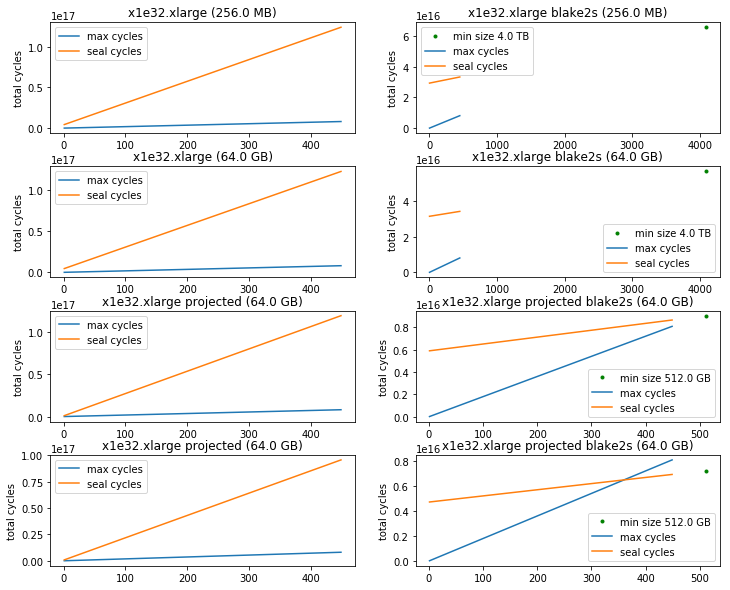

In [6]:
compare_zigzags(alternatives, requirements=filecoin_scaling_requirements)

In [7]:
target_sector_size=64*GiB

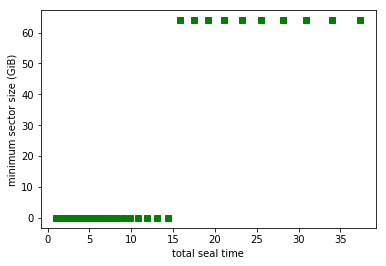

In [8]:
plot_relaxed_requirements(x1e32_projected, filecoin_scaling_requirements, target_sector_size)

In [9]:
# Doesn't terminate.
# plot_accelerated_proving(x1e32_projected, filecoin_scaling_requirements, target_sector_size)

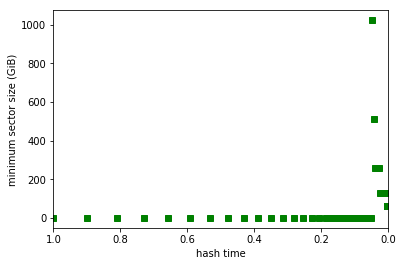

In [10]:
plot_accelerated_hashing(x1e32_projected, filecoin_scaling_requirements, target_sector_size)

In [11]:
x1e32_projected.meets_performance_requirements(64 * GiB, filecoin_scaling_requirements)

False

In [12]:
x1e32_projected_relaxed.meets_performance_requirements(64 * GiB, filecoin_scaling_requirements)

False

In [13]:
pb = x1e32_projected.scaled_for_new_hash(blake2s)
prb = x1e32_projected_relaxed.scaled_for_new_hash(blake2s)

In [14]:
humanize_bytes(x1e32_projected.minimum_viable_sector_size(filecoin_scaling_requirements))

'0.0 bytes'

In [15]:
humanize_bytes(x1e32_projected_relaxed.minimum_viable_sector_size(filecoin_scaling_requirements))

'0.0 bytes'

In [16]:
humanize_bytes(prb.minimum_viable_sector_size(filecoin_scaling_requirements))

'512.0 GB'

In [17]:
humanize_bytes(pb.minimum_viable_sector_size(filecoin_scaling_requirements))

'512.0 GB'

In [91]:
accelerated_instance = replace(projected_instance, groth_acceleration=8)
x1e32_accelerated = ZigZag(security=filecoin_security_requirements, instance=accelerated_instance, partitions=8)
x1e32_accelerated_blake2s = x1e32_accelerated.scaled_for_new_hash(blake2s)

In [92]:
humanize_bytes(x1e32_accelerated.minimum_viable_sector_size(filecoin_scaling_requirements))

'0.0 bytes'

In [93]:
humanize_seconds(x1e32_projected.total_seal_time()), humanize_seconds(x1e32_projected.replication_time()), humanize_seconds(x1e32_projected.groth_proving_time())

('2140:59:35.0', '2042:59:30.9', '97:59:32.3')

In [94]:
humanize_seconds(x1e32_accelerated.total_seal_time()), humanize_seconds(x1e32_accelerated.replication_time()), humanize_seconds(x1e32_accelerated.groth_proving_time())

('2055:14:59.2', '2042:59:30.9', '12:14:56.5')

In [95]:
humanize_seconds(x1e32_accelerated.vanilla_proving_time()), humanize_seconds(x1e32_accelerated.total_proving_time())

('00:00:31.8', '12:15:28.3')

In [96]:
humanize_seconds(x1e32_accelerated.replication_time(64*GiB) + x1e32_accelerated.total_proving_time())

'2055:14:59.2'

In [97]:
accelerated_instance.replication_time_per_GiB()

8659.193745774499

In [98]:
humanize_seconds(x1e32_accelerated_blake2s.replication_time())

'47:30:28.7'

In [99]:
humanize_bytes(x1e32_accelerated_blake2s.minimum_viable_sector_size(filecoin_scaling_requirements))

'64.0 GB'

Need 8x groth acceleration for 64 GiB.